In [42]:
#导包
import scorecardpy as sc
import pandas as pd
import numpy as np

数据加载与数据处理

In [43]:
data=pd.read_csv('data/data_cq.csv')

# patients_age    = pre_pyh_df.pop('patients_age')
print(data.shape,data.columns)

(428, 9) Index(['Lymphocytes', 'Neutrophil', 'White_Blood_Cells', 'Platelet_Count',
       'APTT', 'INR', 'Monocytes', 'age', 'dead'],
      dtype='object')


In [44]:
# 查看数据内容
# data['Platelet_Count']=np.log10(data['Platelet_Count'])
data.sample(5)

Lymphocytes  Neutrophil  White_Blood_Cells  Platelet_Count  APTT   INR  \
317         0.40       10.58              11.22             119  23.5  1.46   
340         0.37        9.75              10.70             134  54.6  1.52   
344         0.19        5.71               6.06             132  45.4  1.53   
281         0.63        8.47              10.01             185  34.3  1.40   
123         0.71        8.61               9.97              96  31.8  1.24   

     Monocytes  age  dead  
317       0.19   57     1  
340       0.58   47     1  
344       0.10   68     1  
281       0.88   70     0  
123       0.57   72     0

In [45]:
#描述性统计
data.describe()

Lymphocytes  Neutrophil  White_Blood_Cells  Platelet_Count        APTT  \
count   428.000000  428.000000          428.00000      428.000000  428.000000   
mean      0.581495   11.645724           12.82278      165.245327   45.165187   
std       0.325572    8.095317            8.41275      112.009589   22.924631   
min       0.020000    1.150000            1.72000        3.000000   22.400000   
25%       0.370000    6.115000            6.96250       88.000000   35.375000   
50%       0.540000    9.990000           11.02000      138.000000   41.650000   
75%       0.722500   15.050000           16.25000      212.000000   49.400000   
max       2.310000   71.530000           72.62000      675.000000  300.000000   

              INR   Monocytes         age        dead  
count  428.000000  428.000000  428.000000  428.000000  
mean     1.363925    0.564883   64.857477    0.273364  
std      0.240820    0.875867   15.072682    0.446208  
min      0.900000    0.000000   18.000000    0.000000  
25%      1.230000    0.220000   55.000000    0.000000  
50%      1.310000    0.460000   67.000000    0.000000  
75%      1.470000    0.722500   76.000000    1.000000  
max      2.260000   16.700000   98.000000    1.000000

In [46]:
# 数据之间的相关性
data.corr()

Lymphocytes  Neutrophil  White_Blood_Cells  Platelet_Count  \
Lymphocytes           1.000000    0.266013           0.321009        0.087560   
Neutrophil            0.266013    1.000000           0.997352        0.155356   
White_Blood_Cells     0.321009    0.997352           1.000000        0.158943   
Platelet_Count        0.087560    0.155356           0.158943        1.000000   
APTT                 -0.001675   -0.006215          -0.008853       -0.115254   
INR                   0.070256    0.076417           0.077218       -0.152560   
Monocytes             0.375370    0.231448           0.263691        0.048588   
age                  -0.147724    0.030367           0.022121        0.032324   
dead                 -0.044412   -0.091143          -0.092418        0.014774   

                       APTT       INR  Monocytes       age      dead  
Lymphocytes       -0.001675  0.070256   0.375370 -0.147724 -0.044412  
Neutrophil        -0.006215  0.076417   0.231448  0.030367 -0.091143  
White_Blood_Cells -0.008853  0.077218   0.263691  0.022121 -0.092418  
Platelet_Count    -0.115254 -0.152560   0.048588  0.032324  0.014774  
APTT               1.000000  0.263145  -0.047492 -0.168723  0.065358  
INR                0.263145  1.000000  -0.006035 -0.051545  0.216651  
Monocytes         -0.047492 -0.006035   1.000000 -0.042228  0.027796  
age               -0.168723 -0.051545  -0.042228  1.000000  0.034360  
dead               0.065358  0.216651   0.027796  0.034360  1.000000

数据筛选

In [47]:
dt_s = sc.var_filter(data,y="dead",iv_limit=0.02,positive='0')

[INFO] filtering variables ...


d:\Anaconda3\envs\score_mimic\lib\site-packages\scorecardpy\condition_fun.py:141: UserWarning: The positive value in "dead" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))


In [48]:
dt_s.shape

(428, 9)

###### 划分数据

In [49]:
train,test = sc.split_df(dt=dt_s,y="dead").values()

In [50]:
train.dead.value_counts()

dead
1    218
0     82
Name: count, dtype: int64

In [51]:
test.dead.value_counts()


dead
1    93
0    35
Name: count, dtype: int64

三、 变量分箱

In [52]:
bins = sc.woebin(dt_s,y="dead",method="chimerge")

[INFO] creating woe binning ...
bin_chisq_min < chisq_limit or bin_count_distr_min < count_distr_limit or bin_nrow > bin_num_limit 0.0007535674202340781 2.70554345409542 0.014018691588785047 0.05 25 8
bin_list {'binning_sv': None, 'binning':    brkp                                           variable         bin  good  \
0  -inf  [[[[array([array([array([array([array([array([...  [-inf,9.0)    58   
1   9.0  [[[[array([array([array([array([array([array([...  [9.0,10.0)    12   
2  10.0  [[[[array([array([array([array([array([array([...  [10.0,inf)    47   

   bad   badprob  count     chisq  
0  132  0.694737    190       NaN  
1   12  0.500000     24  3.671253  
2  167  0.780374    214  9.098544  }
bins[x_i]                                             variable         bin  count  \
0  [[[[array([array([array([array([array([array([...  [-inf,9.0)    190   
1  [[[[array([array([array([array([array([array([...  [9.0,10.0)     24   
2  [[[[array([array([array([array([array([array([...  [10

In [53]:
bins_df = pd.concat(bins).reset_index().drop(columns="level_0")
bins_df

level_1                                           variable  \
0         0  [[[[array([array([array([array([array([array([...   
1         1  [[[[array([array([array([array([array([array([...   
2         2  [[[[array([array([array([array([array([array([...   
3         0  [[[[array([array([array([array([array([array([...   
4         1  [[[[array([array([array([array([array([array([...   
5         2  [[[[array([array([array([array([array([array([...   
6         0  [[[[array([array([array([array([array([array([...   
7         1  [[[[array([array([array([array([array([array([...   
8         2  [[[[array([array([array([array([array([array([...   
9         0  [[[[array([array([array([array([array([array([...   
10        1  [[[[array([array([array([array([array([array([...   
11        2  [[[[array([array([array([array([array([array([...   
12        3  [[[[array([array([array([array([array([array([...   
13        4  [[[[array([array([array([array([array([array([...   
14        0  [[[[array([array([array([array([array([array([...   
15        1  [[[[array([array([array([array([array([array([...   
16        2  [[[[array([array([array([array([array([array([...   
17        0  [[[[array([array([array([array([array([array([...   
18        1  [[[[array([array([array([array([array([array([...   
19        2  [[[[array([array([array([array([array([array([...   
20        0  [[[[array([array([array([array([array([array([...   
21        0  [[[[array([array([array([array([array([array([...   

                                        bin  count  count_distr  good  bad  \
0                                [-inf,9.0)    190     0.443925    58  132   
1                                [9.0,10.0)     24     0.056075    12   12   
2                                [10.0,inf)    214     0.500000    47  167   
3                               [-inf,80.0)    361     0.843458    92  269   
4                               [80.0,84.0)     28     0.065421    14   14   
5                                [84.0,inf)     39     0.091121    11   28   
6                               [-inf,0.45)    211     0.492991    72  139   
7                 [0.45,0.6000000000000001)     66     0.154206     8   58   
8                  [0.6000000000000001,inf)    151     0.352804    37  114   
9                               [-inf,38.0)    143     0.334112    24  119   
10                              [38.0,44.0)    104     0.242991    27   77   
11                              [44.0,46.0)     29     0.067757    15   14   
12                              [46.0,56.0)    104     0.242991    27   77   
13                               [56.0,inf)     48     0.112150    24   24   
14                              [-inf,12.0)    232     0.542056    75  157   
15                              [12.0,14.0)     40     0.093458     4   36   
16                               [14.0,inf)    156     0.364486    38  118   
17                [-inf,1.2200000000000002)    106     0.247664    15   91   
18  [1.2200000000000002,1.4000000000000004)    176     0.411215    43  133   
19                 [1.4000000000000004,inf)    146     0.341121    59   87   
20                               [-inf,inf)    428     1.000000   117  311   
21                               [-inf,inf)    428     1.000000   117  311   

     badprob       woe    bin_iv  total_iv              breaks  \
0   0.694737 -0.155260  0.011068  0.112874                 9.0   
1   0.500000 -0.977619  0.062547  0.112874                10.0   
2   0.780374  0.290227  0.039258  0.112874                 inf   
3   0.745152  0.095304  0.007493  0.080638                80.0   
4   0.500000 -0.977619  0.072971  0.080638                84.0   
5   0.717949 -0.043310  0.000173  0.080638                 inf   
6   0.658768 -0.319811  0.053869  0.179818                0.45   
7   0.878788  1.003382  0.118519  0.179818  0.6000000000000001   
8   0.754967  0.147662  0.007430  0.179818                 inf   
9   0.832168  0.623451  0.1106

In [54]:
# print(bins["Lymphocytes"])
# sc.woebin_plot(bins["Lymphocytes"])

[INFO] creating woe binning ...
bins[x_i]      variable         bin  count  count_distr  good  bad   badprob       woe  \
0  Neutrophil  [-inf,9.0)    190     0.443925    58  132  0.694737 -0.155260   
1  Neutrophil  [9.0,10.0)     24     0.056075    12   12  0.500000 -0.977619   
2  Neutrophil  [10.0,inf)    214     0.500000    47  167  0.780374  0.290227   

     bin_iv  total_iv breaks  is_special_values  
0  0.011068  0.112874    9.0              False  
1  0.062547  0.112874   10.0              False  
2  0.039258  0.112874    inf              False  
bins[x_i]   variable          bin  count  count_distr  good  bad   badprob       woe  \
0      age  [-inf,40.0)     25     0.058411     4   21  0.840000  0.680609   
1      age  [40.0,80.0)    336     0.785047    88  248  0.738095  0.058473   
2      age   [80.0,inf)     67     0.156542    25   42  0.626866 -0.458825   

     bin_iv  total_iv breaks  is_special_values  
0  0.022689  0.061413   40.0              False  
1  0.002648  0

{'Lymphocytes': <Figure size 640x480 with 2 Axes>}

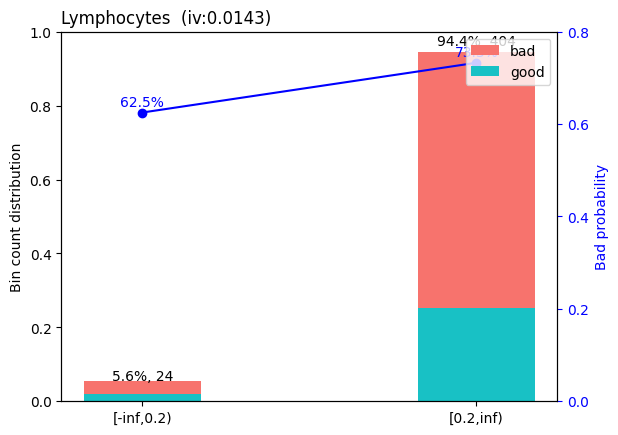

In [55]:
# 手动分箱
break_adj = {
    'Neutrophil':[9,10],
    'White_Blood_Cells':[12,14],
    'Monocytes':[0.4],
    'APTT':[38,44,56],
    'INR':[1.3,1.8],
    'Lymphocytes':[0.2],
    'Platelet_Count':[390],
    'age':[40,80]
}
# break_adj = {
#     'Neutrophil':[10],
#     'White_Blood_Cells':[12],
#     'Monocytes':[0.4],
#     'APTT':[44,56],
#     'INR':[1.3,1.8],
#     'Lymphocytes':[0.2],
#     'Platelet_Count':[390],
#     'age':[40,80]
# }
bins_adj = sc.woebin(dt_s,y="dead",breaks_list=break_adj)
bins_adj_df = pd.concat(bins_adj).reset_index().drop(columns="level_0")
sc.woebin_plot(bins_adj["Lymphocytes"])#1

{'age': <Figure size 640x480 with 2 Axes>}

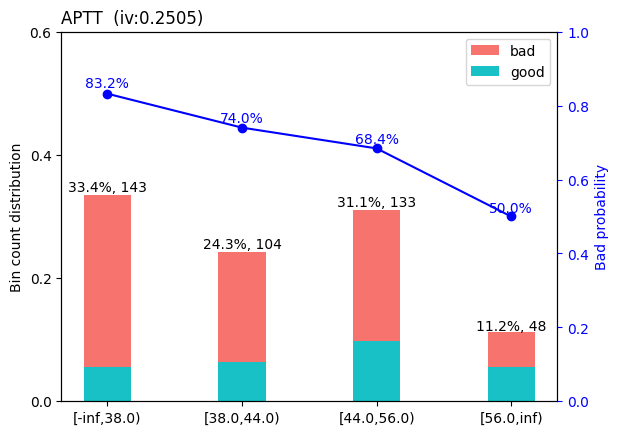

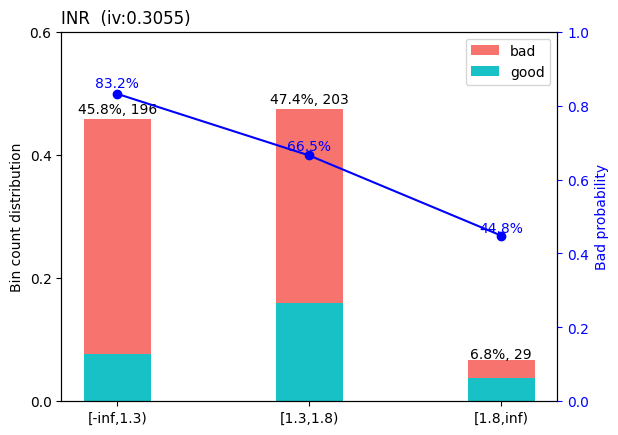

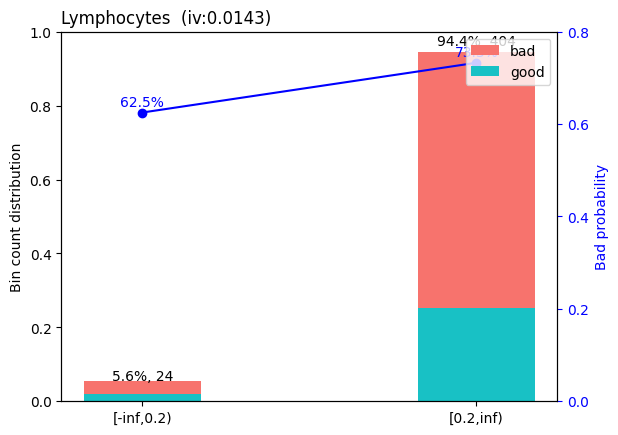

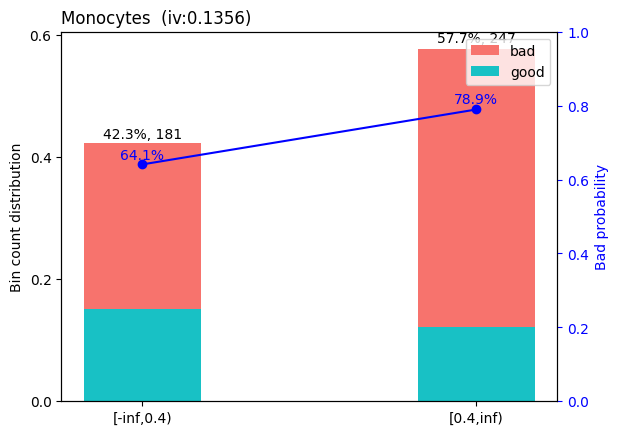

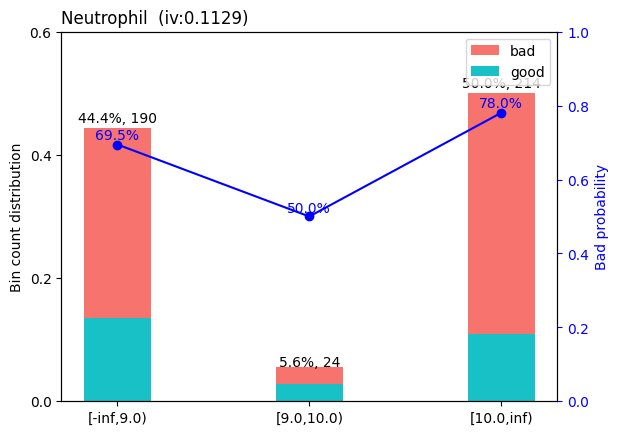

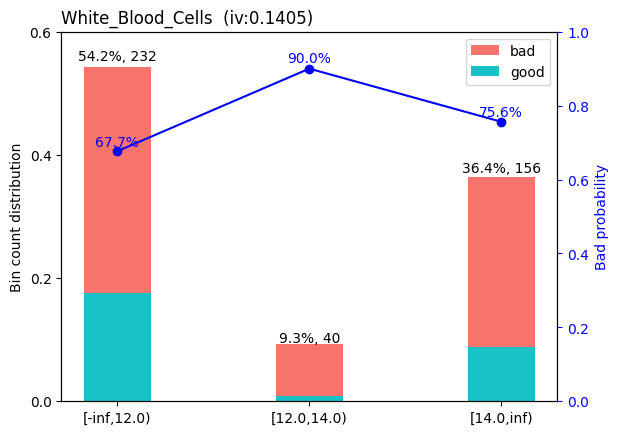

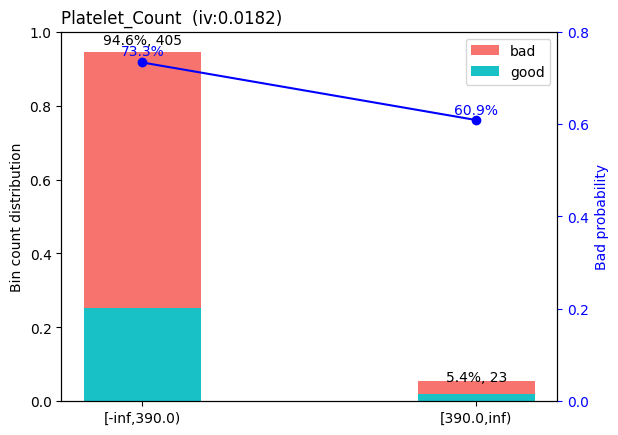

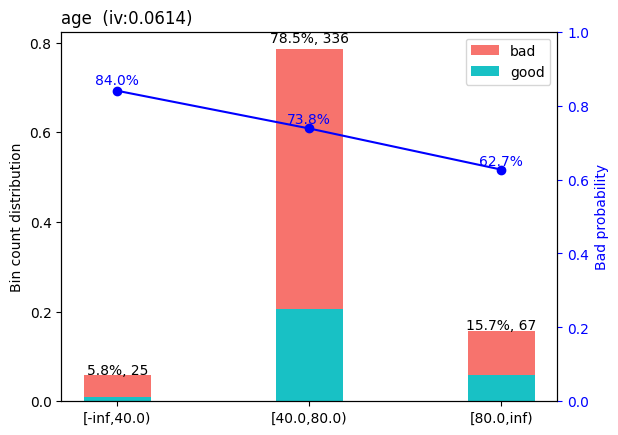

In [56]:
sc.woebin_plot(bins_adj["APTT"])#1
sc.woebin_plot(bins_adj["INR"])#1
sc.woebin_plot(bins_adj["Lymphocytes"])
sc.woebin_plot(bins_adj["Monocytes"])
sc.woebin_plot(bins_adj["Neutrophil"])
sc.woebin_plot(bins_adj["White_Blood_Cells"])
sc.woebin_plot(bins_adj["Platelet_Count"])
sc.woebin_plot(bins_adj["age"])#1

四、WOE转化

In [57]:
# train_woe = sc.woebin_ply(train,bins_adj)
train_woe = sc.woebin_ply(train,bins_adj)

[INFO] converting into woe values ...


In [58]:
test_woe = sc.woebin_ply(test,bins_adj)

[INFO] converting into woe values ...


In [59]:
train_woe.sample(5)

dead  Neutrophil_woe   age_woe  Monocytes_woe  APTT_woe  \
374     0        0.290227  0.058473       0.344137 -0.204429   
111     1       -0.155260  0.058473      -0.398416 -0.204429   
159     1       -0.155260  0.058473       0.344137  0.623451   
408     1        0.290227  0.058473       0.344137 -0.204429   
267     1       -0.155260  0.058473       0.344137  0.070350   

     White_Blood_Cells_woe   INR_woe  Platelet_Count_woe  Lymphocytes_woe  
374               0.155479 -0.291852            0.033982         0.030609  
111              -0.238861  0.619624            0.033982         0.030609  
159              -0.238861  0.619624            0.033982         0.030609  
408               0.155479 -1.185258            0.033982         0.030609  
267              -0.238861 -0.291852            0.033982         0.030609

In [60]:
train_woe

dead  Neutrophil_woe   age_woe  Monocytes_woe  APTT_woe  \
3       1       -0.155260  0.058473       0.344137  0.623451   
4       0       -0.977619 -0.458825      -0.398416  0.070350   
7       1        0.290227  0.058473       0.344137  0.623451   
8       1        0.290227  0.058473      -0.398416  0.623451   
9       1        0.290227  0.058473       0.344137  0.070350   
..    ...             ...       ...            ...       ...   
418     1        0.290227 -0.458825       0.344137 -0.204429   
421     1        0.290227  0.058473       0.344137  0.070350   
424     1       -0.155260  0.058473       0.344137 -0.977619   
426     0       -0.155260  0.058473      -0.398416 -0.204429   
427     0        0.290227  0.058473       0.344137 -0.977619   

     White_Blood_Cells_woe   INR_woe  Platelet_Count_woe  Lymphocytes_woe  
3                -0.238861  0.619624            0.033982        -0.466793  
4                -0.238861  0.619624            0.033982         0.030609  
7                 1.219606  0.619624            0.033982         0.030609  
8                 0.155479  0.619624            0.033982         0.030609  
9                 0.155479  0.619624            0.033982         0.030609  
..                     ...       ...                 ...              ...  
418               0.155479 -1.185258            0.033982         0.030609  
421               0.155479 -1.185258            0.033982         0.030609  
424              -0.238861 -1.185258            0.033982        -0.466793  
426              -0.238861 -1.185258            0.033982         0.030609  
427               0.155479 -1.185258            0.033982         0.030609  

[300 rows x 9 columns]

五、建立模型

In [61]:
# 分离自变量因变量，用于训练
from sklearn.linear_model import LogisticRegression
y_train = train_woe.loc[:,"dead"]
X_train = train_woe.loc[:,train_woe.columns!="dead"]
y_test = test_woe.loc[:,"dead"]
X_test = test_woe.loc[:,test_woe.columns!="dead"]

lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)

LogisticRegression()

In [62]:
lr.coef_

array([[0.72330752, 1.52661362, 0.5538412 , 0.79473243, 0.62607713,
        0.81340471, 0.45744958, 0.40449727]])

In [63]:
lr.intercept_

array([0.9900342])

六、模型评估

In [64]:
train_pred = lr.predict_proba(X_train)[:,1]
test_pred =  lr.predict_proba(X_test)[:,1]

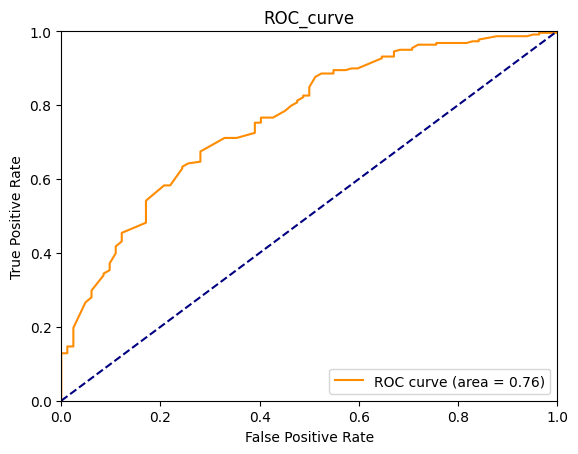

In [65]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_train, train_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()


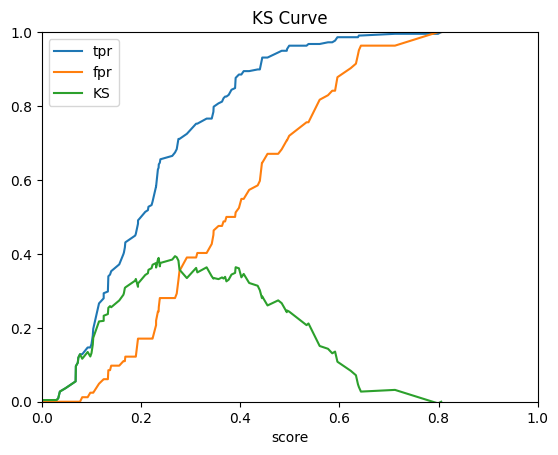

<Figure size 4000x4000 with 0 Axes>

In [66]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.figure(figsize=(40,40))
legend = ax.legend(loc='upper left')
plt.show()

模型验证

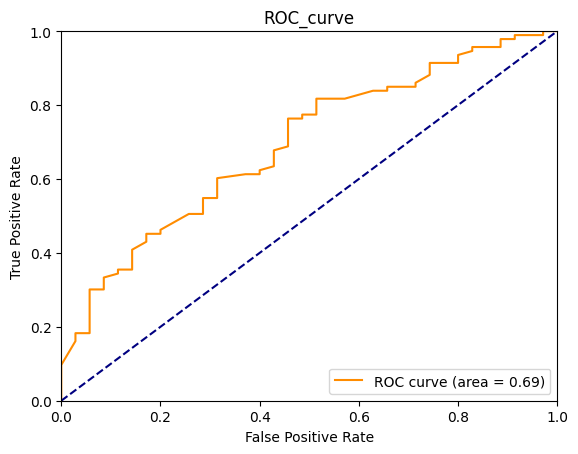

In [67]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, test_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()


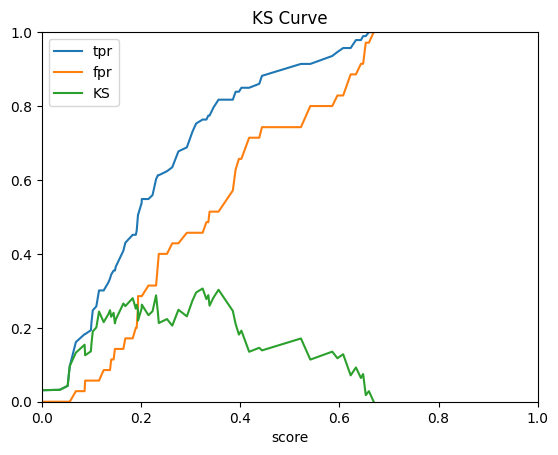

<Figure size 4000x4000 with 0 Axes>

In [68]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.figure(figsize=(40,40))
legend = ax.legend(loc='upper left')
plt.show()

七、评分稳定性

In [69]:
X_train.columns

Index(['Neutrophil_woe', 'age_woe', 'Monocytes_woe', 'APTT_woe',
       'White_Blood_Cells_woe', 'INR_woe', 'Platelet_Count_woe',
       'Lymphocytes_woe'],
      dtype='object')

In [70]:
# 10.评分标尺
card = sc.scorecard(bins_adj,
                    lr,
                    X_train.columns,
                #    points0=600,
                #    odds0=1/19,
                #    pdo=50,
                   points0=10,
                   odds0=2,
                   pdo=2,
                   basepoints_eq0=True)
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

# sc.perf_psi(
#     score = {'train':train_score,'test':test_score},
#     label = {'train':y_train,'test':y_test},
#     # x_limits = [1,30],
#     x_tick_break = 1
# )
card_df = pd.concat(card)
card_df

a,b 12.0 2.8853900817779268


variable           bin  points
basepoints        0          basepoints           NaN     0.0
Neutrophil        0          Neutrophil    [-inf,9.0)     1.0
                  1          Neutrophil    [9.0,10.0)     3.0
                  2          Neutrophil    [10.0,inf)     1.0
age               3                 age   [-inf,40.0)    -2.0
                  4                 age   [40.0,80.0)     1.0
                  5                 age    [80.0,inf)     3.0
Monocytes         6           Monocytes    [-inf,0.4)     2.0
                  7           Monocytes     [0.4,inf)     1.0
APTT              8                APTT   [-inf,38.0)    -0.0
                  9                APTT   [38.0,44.0)     1.0
                  10               APTT   [44.0,56.0)     2.0
                  11               APTT    [56.0,inf)     3.0
White_Blood_Cells 12  White_Blood_Cells   [-inf,12.0)     2.0
                  13  White_Blood_Cells   [12.0,14.0)    -1.0
                  14  White_Blood_Cells    [14.0,inf)     1.0
INR               15                INR    [-inf,1.3)    -0.0
                  16                INR     [1.3,1.8)     2.0
                  17                INR     [1.8,inf)     4.0
Platelet_Count    18     Platelet_Count  [-inf,390.0)     1.0
                  19     Platelet_Count   [390.0,inf)     2.0
Lymphocytes       20        Lymphocytes    [-inf,0.2)     2.0
                  21        Lymphocytes     [0.2,inf)     1.0

([[0.72330752, 0.40449727, 1.52661362, 0.45744958, 0.81340471,
        0.5538412 , 0.79473243, 0.62607713]])

评分验证

In [71]:
data_score=pd.read_csv("data/data_cq_score.csv")
data_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lymphocytes        428 non-null    float64
 1   Neutrophil         428 non-null    float64
 2   White_Blood_Cells  428 non-null    float64
 3   Platelet_Count     428 non-null    int64  
 4   APTT               428 non-null    float64
 5   INR                428 non-null    float64
 6   Monocytes          428 non-null    float64
 7   age                428 non-null    int64  
 8   dead               428 non-null    int64  
 9   LIP                428 non-null    int64  
 10  SOFA               428 non-null    int64  
 11  qSOFA              428 non-null    int64  
 12  SIRS               428 non-null    int64  
 13  ApacheII           428 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 46.9 KB


In [72]:
data_score['score']=0
data_score

Lymphocytes  Neutrophil  White_Blood_Cells  Platelet_Count  APTT   INR  \
0           0.50       13.42              14.63             196  29.2  0.90   
1           0.32        2.58               3.06             139  38.3  0.93   
2           0.02        5.06               5.28             131  24.9  0.94   
3           0.15        6.34               6.90             161  35.5  0.96   
4           0.44        9.17               9.93             159  39.8  0.96   
..           ...         ...                ...             ...   ...   ...   
423         0.54       13.08              13.89             185  48.9  2.13   
424         0.19        5.32               6.16              52  60.2  2.15   
425         0.27        3.52               3.94              68  55.4  2.16   
426         0.39        5.54               6.05             178  53.9  2.17   
427         1.68       12.21              14.47             172  69.1  2.26   

     Monocytes  age  dead  LIP  SOFA  qSOFA  SIRS  ApacheII  score  
0         0.70   45     0    3     2      0     1         8      0  
1         0.15   43     1    2     3      1     3        11      0  
2         0.16   76     1    2     3      1     2        12      0  
3         0.40   69     0    3     2      1     2        17      0  
4         0.32   83     1    4     3      2     1        28      0  
..         ...  ...   ...  ...   ...    ...   ...       ...    ...  
423       0.24   46     0    6     7      3     3        19      0  
424       0.62   77     0    4     8      3     1        13      0  
425       0.14   72     1    6     8      2     4        31      0  
426       0.10   55     1    6     7      3     1        18      0  
427       0.41   68     1    4     8      3     3        23      0  

[428 rows x 15 columns]

In [73]:
import re
for i in range(data_score.shape[0]):
    score=0
    if len(card['APTT'])==2:
        if data_score['APTT'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[0])[0]):
            score=score+list(card['APTT']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[1])[0])<=data_score['APTT'][i]:
            score=score+list(card['APTT']['points'])[1]
    elif len(card['APTT'])==3:
        if data_score['APTT'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[0])[0]):
            score=score+list(card['APTT']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[1])[0])<=data_score['APTT'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[1])[1]):
            score=score+list(card['APTT']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[2])[0])<=data_score['APTT'][i]:
            score=score+list(card['APTT']['points'])[2]
    elif len(card['APTT'])==4:
        if data_score['APTT'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[0])[0]):
            score=score+list(card['APTT']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[1])[0])<=data_score['APTT'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[1])[1]):
            score=score+list(card['APTT']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[2])[0])<=data_score['APTT'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[2])[1]):
            score=score+list(card['APTT']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[3])[0])<=data_score['APTT'][i]:
            score=score+list(card['APTT']['points'])[3]
    elif len(card['APTT'])==5:
        if data_score['APTT'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[0])[0]):
            score=score+list(card['APTT']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[1])[0])<=data_score['APTT'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[1])[1]):
            score=score+list(card['APTT']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[2])[0])<=data_score['APTT'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[2])[1]):
            score=score+list(card['APTT']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[3])[0])<=data_score['APTT'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[3])[1]):
            score=score+list(card['APTT']['points'])[3]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['APTT']['bin'])[4])[0])<=data_score['APTT'][i]:
            score=score+list(card['APTT']['points'])[4]
    
    if len(card['Lymphocytes']) == 2:
        if data_score['Lymphocytes'][i] < float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[0])[0]):
            score = score+list(card['Lymphocytes']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[1])[0]) <= data_score['Lymphocytes'][i]:
            score = score+list(card['Lymphocytes']['points'])[1]
    elif len(card['Lymphocytes'])==3:
        if data_score['Lymphocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[0])[0]):
            score=score+list(card['Lymphocytes']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[1])[0])<=data_score['Lymphocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[1])[1]):
            score=score+list(card['Lymphocytes']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[2])[0])<=data_score['Lymphocytes'][i]:
            score=score+list(card['Lymphocytes']['points'])[2]
    elif len(card['Lymphocytes'])==4:
        if data_score['Lymphocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[0])[0]):
            score=score+list(card['Lymphocytes']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[1])[0])<=data_score['Lymphocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[1])[1]):
            score=score+list(card['Lymphocytes']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[2])[0])<=data_score['Lymphocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[2])[1]):
            score=score+list(card['Lymphocytes']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[3])[0])<=data_score['Lymphocytes'][i]:
            score=score+list(card['Lymphocytes']['points'])[3]
    elif len(card['Lymphocytes'])==5:
        if data_score['Lymphocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[0])[0]):
            score=score+list(card['Lymphocytes']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[1])[0])<=data_score['Lymphocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[1])[1]):
            score=score+list(card['Lymphocytes']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[2])[0])<=data_score['Lymphocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[2])[1]):
            score=score+list(card['Lymphocytes']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[3])[0])<=data_score['Lymphocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[3])[1]):
            score=score+list(card['Lymphocytes']['points'])[3]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Lymphocytes']['bin'])[4])[0])<=data_score['Lymphocytes'][i]:
            score=score+list(card['Lymphocytes']['points'])[4]
    
    if len(card['Neutrophil']) == 2:
        if data_score['Neutrophil'][i] < float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[0])[0]):
            score = score+list(card['Neutrophil']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[1])[0]) <= data_score['Neutrophil'][i]:
            score = score+list(card['Neutrophil']['points'])[1]
    elif len(card['Neutrophil'])==3:
        if data_score['Neutrophil'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[0])[0]):
            score=score+list(card['Neutrophil']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[1])[0])<=data_score['Neutrophil'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[1])[1]):
            score=score+list(card['Neutrophil']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[2])[0])<=data_score['Neutrophil'][i]:
            score=score+list(card['Neutrophil']['points'])[2]
    elif len(card['Neutrophil'])==4:
        if data_score['Neutrophil'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[0])[0]):
            score=score+list(card['Neutrophil']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[1])[0])<=data_score['Neutrophil'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[1])[1]):
            score=score+list(card['Neutrophil']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[2])[0])<=data_score['Neutrophil'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[2])[1]):
            score=score+list(card['Neutrophil']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[3])[0])<=data_score['Neutrophil'][i]:
            score=score+list(card['Neutrophil']['points'])[3]
    elif len(card['Neutrophil'])==5:
        if data_score['Neutrophil'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[0])[0]):
            score=score+list(card['Neutrophil']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[1])[0])<=data_score['Neutrophil'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[1])[1]):
            score=score+list(card['Neutrophil']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[2])[0])<=data_score['Neutrophil'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[2])[1]):
            score=score+list(card['Neutrophil']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[3])[0])<=data_score['Neutrophil'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[3])[1]):
            score=score+list(card['Neutrophil']['points'])[3]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Neutrophil']['bin'])[4])[0])<=data_score['Neutrophil'][i]:
            score=score+list(card['Neutrophil']['points'])[4]
    
    if len(card['White_Blood_Cells']) == 2:
        if data_score['White_Blood_Cells'][i] < float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[0])[0]):
            score = score+list(card['White_Blood_Cells']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[1])[0]) <= data_score['White_Blood_Cells'][i]:
            score = score+list(card['White_Blood_Cells']['points'])[1]
    elif len(card['White_Blood_Cells'])==3:
        if data_score['White_Blood_Cells'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[0])[0]):
            score=score+list(card['White_Blood_Cells']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[1])[0])<=data_score['White_Blood_Cells'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[1])[1]):
            score=score+list(card['White_Blood_Cells']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[2])[0])<=data_score['White_Blood_Cells'][i]:
            score=score+list(card['White_Blood_Cells']['points'])[2]
    elif len(card['White_Blood_Cells'])==4:
        if data_score['White_Blood_Cells'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[0])[0]):
            score=score+list(card['White_Blood_Cells']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[1])[0])<=data_score['White_Blood_Cells'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[1])[1]):
            score=score+list(card['White_Blood_Cells']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[2])[0])<=data_score['White_Blood_Cells'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[2])[1]):
            score=score+list(card['White_Blood_Cells']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[3])[0])<=data_score['White_Blood_Cells'][i]:
            score=score+list(card['White_Blood_Cells']['points'])[3]
    elif len(card['White_Blood_Cells'])==5:
        if data_score['White_Blood_Cells'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[0])[0]):
            score=score+list(card['White_Blood_Cells']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[1])[0])<=data_score['White_Blood_Cells'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[1])[1]):
            score=score+list(card['White_Blood_Cells']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[2])[0])<=data_score['White_Blood_Cells'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[2])[1]):
            score=score+list(card['White_Blood_Cells']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[3])[0])<=data_score['White_Blood_Cells'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[3])[1]):
            score=score+list(card['White_Blood_Cells']['points'])[3]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['White_Blood_Cells']['bin'])[4])[0])<=data_score['White_Blood_Cells'][i]:
            score=score+list(card['White_Blood_Cells']['points'])[4]
    
    if len(card['Platelet_Count']) == 2:
        if data_score['Platelet_Count'][i] < float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[0])[0]):
            score = score+list(card['Platelet_Count']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[1])[0]) <= data_score['Platelet_Count'][i]:
            score = score+list(card['Platelet_Count']['points'])[1]
    elif len(card['Platelet_Count'])==3:
        if data_score['Platelet_Count'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[0])[0]):
            score=score+list(card['Platelet_Count']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[1])[0])<=data_score['Platelet_Count'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[1])[1]):
            score=score+list(card['Platelet_Count']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[2])[0])<=data_score['Platelet_Count'][i]:
            score=score+list(card['Platelet_Count']['points'])[2]
    elif len(card['Platelet_Count'])==4:
        if data_score['Platelet_Count'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[0])[0]):
            score=score+list(card['Platelet_Count']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[1])[0])<=data_score['Platelet_Count'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[1])[1]):
            score=score+list(card['Platelet_Count']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[2])[0])<=data_score['Platelet_Count'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[2])[1]):
            score=score+list(card['Platelet_Count']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[3])[0])<=data_score['Platelet_Count'][i]:
            score=score+list(card['Platelet_Count']['points'])[3]
    elif len(card['Platelet_Count'])==5:
        if data_score['Platelet_Count'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[0])[0]):
            score=score+list(card['Platelet_Count']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[1])[0])<=data_score['Platelet_Count'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[1])[1]):
            score=score+list(card['Platelet_Count']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[2])[0])<=data_score['Platelet_Count'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[2])[1]):
            score=score+list(card['Platelet_Count']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[3])[0])<=data_score['Platelet_Count'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[3])[1]):
            score=score+list(card['Platelet_Count']['points'])[3]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Platelet_Count']['bin'])[4])[0])<=data_score['Platelet_Count'][i]:
            score=score+list(card['Platelet_Count']['points'])[4]
    
    if len(card['INR']) == 2:
        if data_score['INR'][i] < float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[0])[0]):
            score = score+list(card['INR']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[1])[0]) <= data_score['INR'][i]:
            score = score+list(card['INR']['points'])[1]
    elif len(card['INR'])==3:
        if data_score['INR'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[0])[0]):
            score=score+list(card['INR']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[1])[0])<=data_score['INR'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[1])[1]):
            score=score+list(card['INR']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[2])[0])<=data_score['INR'][i]:
            score=score+list(card['INR']['points'])[2]
    elif len(card['INR'])==4:
        if data_score['INR'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[0])[0]):
            score=score+list(card['INR']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[1])[0])<=data_score['INR'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[1])[1]):
            score=score+list(card['INR']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[2])[0])<=data_score['INR'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[2])[1]):
            score=score+list(card['INR']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[3])[0])<=data_score['INR'][i]:
            score=score+list(card['INR']['points'])[3]
    elif len(card['INR'])==5:
        if data_score['INR'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[0])[0]):
            score=score+list(card['INR']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[1])[0])<=data_score['INR'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[1])[1]):
            score=score+list(card['INR']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[2])[0])<=data_score['INR'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[2])[1]):
            score=score+list(card['INR']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[3])[0])<=data_score['INR'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[3])[1]):
            score=score+list(card['INR']['points'])[3]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['INR']['bin'])[4])[0])<=data_score['INR'][i]:
            score=score+list(card['INR']['points'])[4]
    
    if len(card['Monocytes']) == 2:
        if data_score['Monocytes'][i] < float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[0])[0]):
            score = score+list(card['Monocytes']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[1])[0]) <= data_score['Monocytes'][i]:
            score = score+list(card['Monocytes']['points'])[1]
    elif len(card['Monocytes'])==3:
        if data_score['Monocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[0])[0]):
            score=score+list(card['Monocytes']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[1])[0])<=data_score['Monocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[1])[1]):
            score=score+list(card['Monocytes']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[2])[0])<=data_score['Monocytes'][i]:
            score=score+list(card['Monocytes']['points'])[2]
    elif len(card['Monocytes'])==4:
        if data_score['Monocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[0])[0]):
            score=score+list(card['Monocytes']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[1])[0])<=data_score['Monocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[1])[1]):
            score=score+list(card['Monocytes']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[2])[0])<=data_score['Monocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[2])[1]):
            score=score+list(card['Monocytes']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[3])[0])<=data_score['Monocytes'][i]:
            score=score+list(card['Monocytes']['points'])[3]
    elif len(card['Monocytes'])==5:
        if data_score['Monocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[0])[0]):
            score=score+list(card['Monocytes']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[1])[0])<=data_score['Monocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[1])[1]):
            score=score+list(card['Monocytes']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[2])[0])<=data_score['Monocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[2])[1]):
            score=score+list(card['Monocytes']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[3])[0])<=data_score['Monocytes'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[3])[1]):
            score=score+list(card['Monocytes']['points'])[3]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['Monocytes']['bin'])[4])[0])<=data_score['Monocytes'][i]:
            score=score+list(card['Monocytes']['points'])[4]
    
    if len(card['age']) == 2:
        if data_score['age'][i] < float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[0])[0]):
            score = score+list(card['age']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[1])[0]) <= data_score['age'][i]:
            score = score+list(card['age']['points'])[1]
    elif len(card['age'])==3:
        if data_score['age'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[0])[0]):
            score=score+list(card['age']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[1])[0])<=data_score['age'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[1])[1]):
            score=score+list(card['age']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[2])[0])<=data_score['age'][i]:
            score=score+list(card['age']['points'])[2]
    elif len(card['age'])==4:
        if data_score['age'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[0])[0]):
            score=score+list(card['age']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[1])[0])<=data_score['age'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[1])[1]):
            score=score+list(card['age']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[2])[0])<=data_score['age'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[2])[1]):
            score=score+list(card['age']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[3])[0])<=data_score['age'][i]:
            score=score+list(card['age']['points'])[3]
    elif len(card['age'])==5:
        if data_score['age'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[0])[0]):
            score=score+list(card['age']['points'])[0]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[1])[0])<=data_score['age'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[1])[1]):
            score=score+list(card['age']['points'])[1]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[2])[0])<=data_score['age'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[2])[1]):
            score=score+list(card['age']['points'])[2]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[3])[0])<=data_score['age'][i]<float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[3])[1]):
            score=score+list(card['age']['points'])[3]
        elif float(re.findall(r'-?\d+\.?\d*e?-?\d*?', list(card['age']['bin'])[4])[0])<=data_score['age'][i]:
            score=score+list(card['age']['points'])[4]
    
    data_score['score'][i]=round(score)-1.0
data_score


C:\Users\lz\AppData\Local\Temp\ipykernel_22220\1950035463.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_score['score'][i]=round(score)-1.0
C:\Users\lz\AppData\Local\Temp\ipykernel_22220\1950035463.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_score['score'][i]=round(score)-1.0
C:\Users\lz\AppData\Local\Temp\ipykernel_22220\1950035463.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_score['score'][i]=

Lymphocytes  Neutrophil  White_Blood_Cells  Platelet_Count  APTT   INR  \
0           0.50       13.42              14.63             196  29.2  0.90   
1           0.32        2.58               3.06             139  38.3  0.93   
2           0.02        5.06               5.28             131  24.9  0.94   
3           0.15        6.34               6.90             161  35.5  0.96   
4           0.44        9.17               9.93             159  39.8  0.96   
..           ...         ...                ...             ...   ...   ...   
423         0.54       13.08              13.89             185  48.9  2.13   
424         0.19        5.32               6.16              52  60.2  2.15   
425         0.27        3.52               3.94              68  55.4  2.16   
426         0.39        5.54               6.05             178  53.9  2.17   
427         1.68       12.21              14.47             172  69.1  2.26   

     Monocytes  age  dead  LIP  SOFA  qSOFA  SIRS  ApacheII  score  
0         0.70   45     0    3     2      0     1         8      5  
1         0.15   43     1    2     3      1     3        11      8  
2         0.16   76     1    2     3      1     2        12      8  
3         0.40   69     0    3     2      1     2        17      7  
4         0.32   83     1    4     3      2     1        28     12  
..         ...  ...   ...  ...   ...    ...   ...       ...    ...  
423       0.24   46     0    6     7      3     3        19     10  
424       0.62   77     0    4     8      3     1        13     14  
425       0.14   72     1    6     8      2     4        31     13  
426       0.10   55     1    6     7      3     1        18     13  
427       0.41   68     1    4     8      3     3        23     12  

[428 rows x 15 columns]

In [74]:
min(data_score['score']),max(data_score['score'])

(2, 16)

In [75]:
# data_score.to_csv("cq_score.csv")

ACC计算

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for i in range(0,16):
tp=fp=tn=fn=0
for j in range(data_score.shape[0]):
    if data_score['score'][j]>=12:
        if data_score['dead'][j]==1:
            tp=tp+1#1,1
        else:
            fp=fp+1#1,0
    else:
        if data_score['dead'][j]==1:
            fn=fn+1#0,1
        else:
            tn=tn+1#0,0 
acc=(tp+tn)/(tp+fp+tn+fn)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
tpr=sensitivity=tp/(tp+tn)
tnr=specificity=tn/(tn+fp)
F1=(2*precision*recall)/(precision+recall)
print(acc,precision,recall,tpr,specificity,F1,tp,fp,tn,fn)

0.7616822429906542 0.6415094339622641 0.2905982905982906 0.10429447852760736 0.9389067524115756 0.4000000000000001 34 19 292 83


In [77]:
level=[6.0,9.0,12.0,15.0]
c1=c2=c3=c4=c5=0
d1=d2=d3=d4=d5=0
data_score['level']=0
# 6,9,11,13
for i in range(data_score.shape[0]):    
    if data_score['score'][i]<level[0]:
        data_score['level'][i]=1
        if data_score['dead'][i]==1:
            c1=c1+1
        d1=d1+1
    elif level[0]<=data_score['score'][i]<level[1]:
        data_score['level'][i]=2
        if data_score['dead'][i]==1:
            c2=c2+1
        d2=d2+1
    elif level[1]<=data_score['score'][i]<level[2]:
        data_score['level'][i]=3
        if data_score['dead'][i]==1:
            c3=c3+1
        d3=d3+1
    elif level[2]<=data_score['score'][i]:
        data_score['level'][i]=4
        if data_score['dead'][i]==1:
            c4=c4+1
        d4=d4+1
print(c1,c2,c3,c4,"\n",d1,d2,d3,d4)
print(c1/d1,c2/d2,c3/d3,c4/d4)

C:\Users\lz\AppData\Local\Temp\ipykernel_22220\3961089844.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_score['level'][i]=1
C:\Users\lz\AppData\Local\Temp\ipykernel_22220\3961089844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_score['level'][i]=2
C:\Users\lz\AppData\Local\Temp\ipykernel_22220\3961089844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_score['level'][i]=2
C:\Users\lz\AppData\Local\Temp\i

2 29 52 34 
 50 164 161 53
0.04 0.17682926829268292 0.32298136645962733 0.6415094339622641


In [84]:
# data_score.to_csv('cq_score.csv')

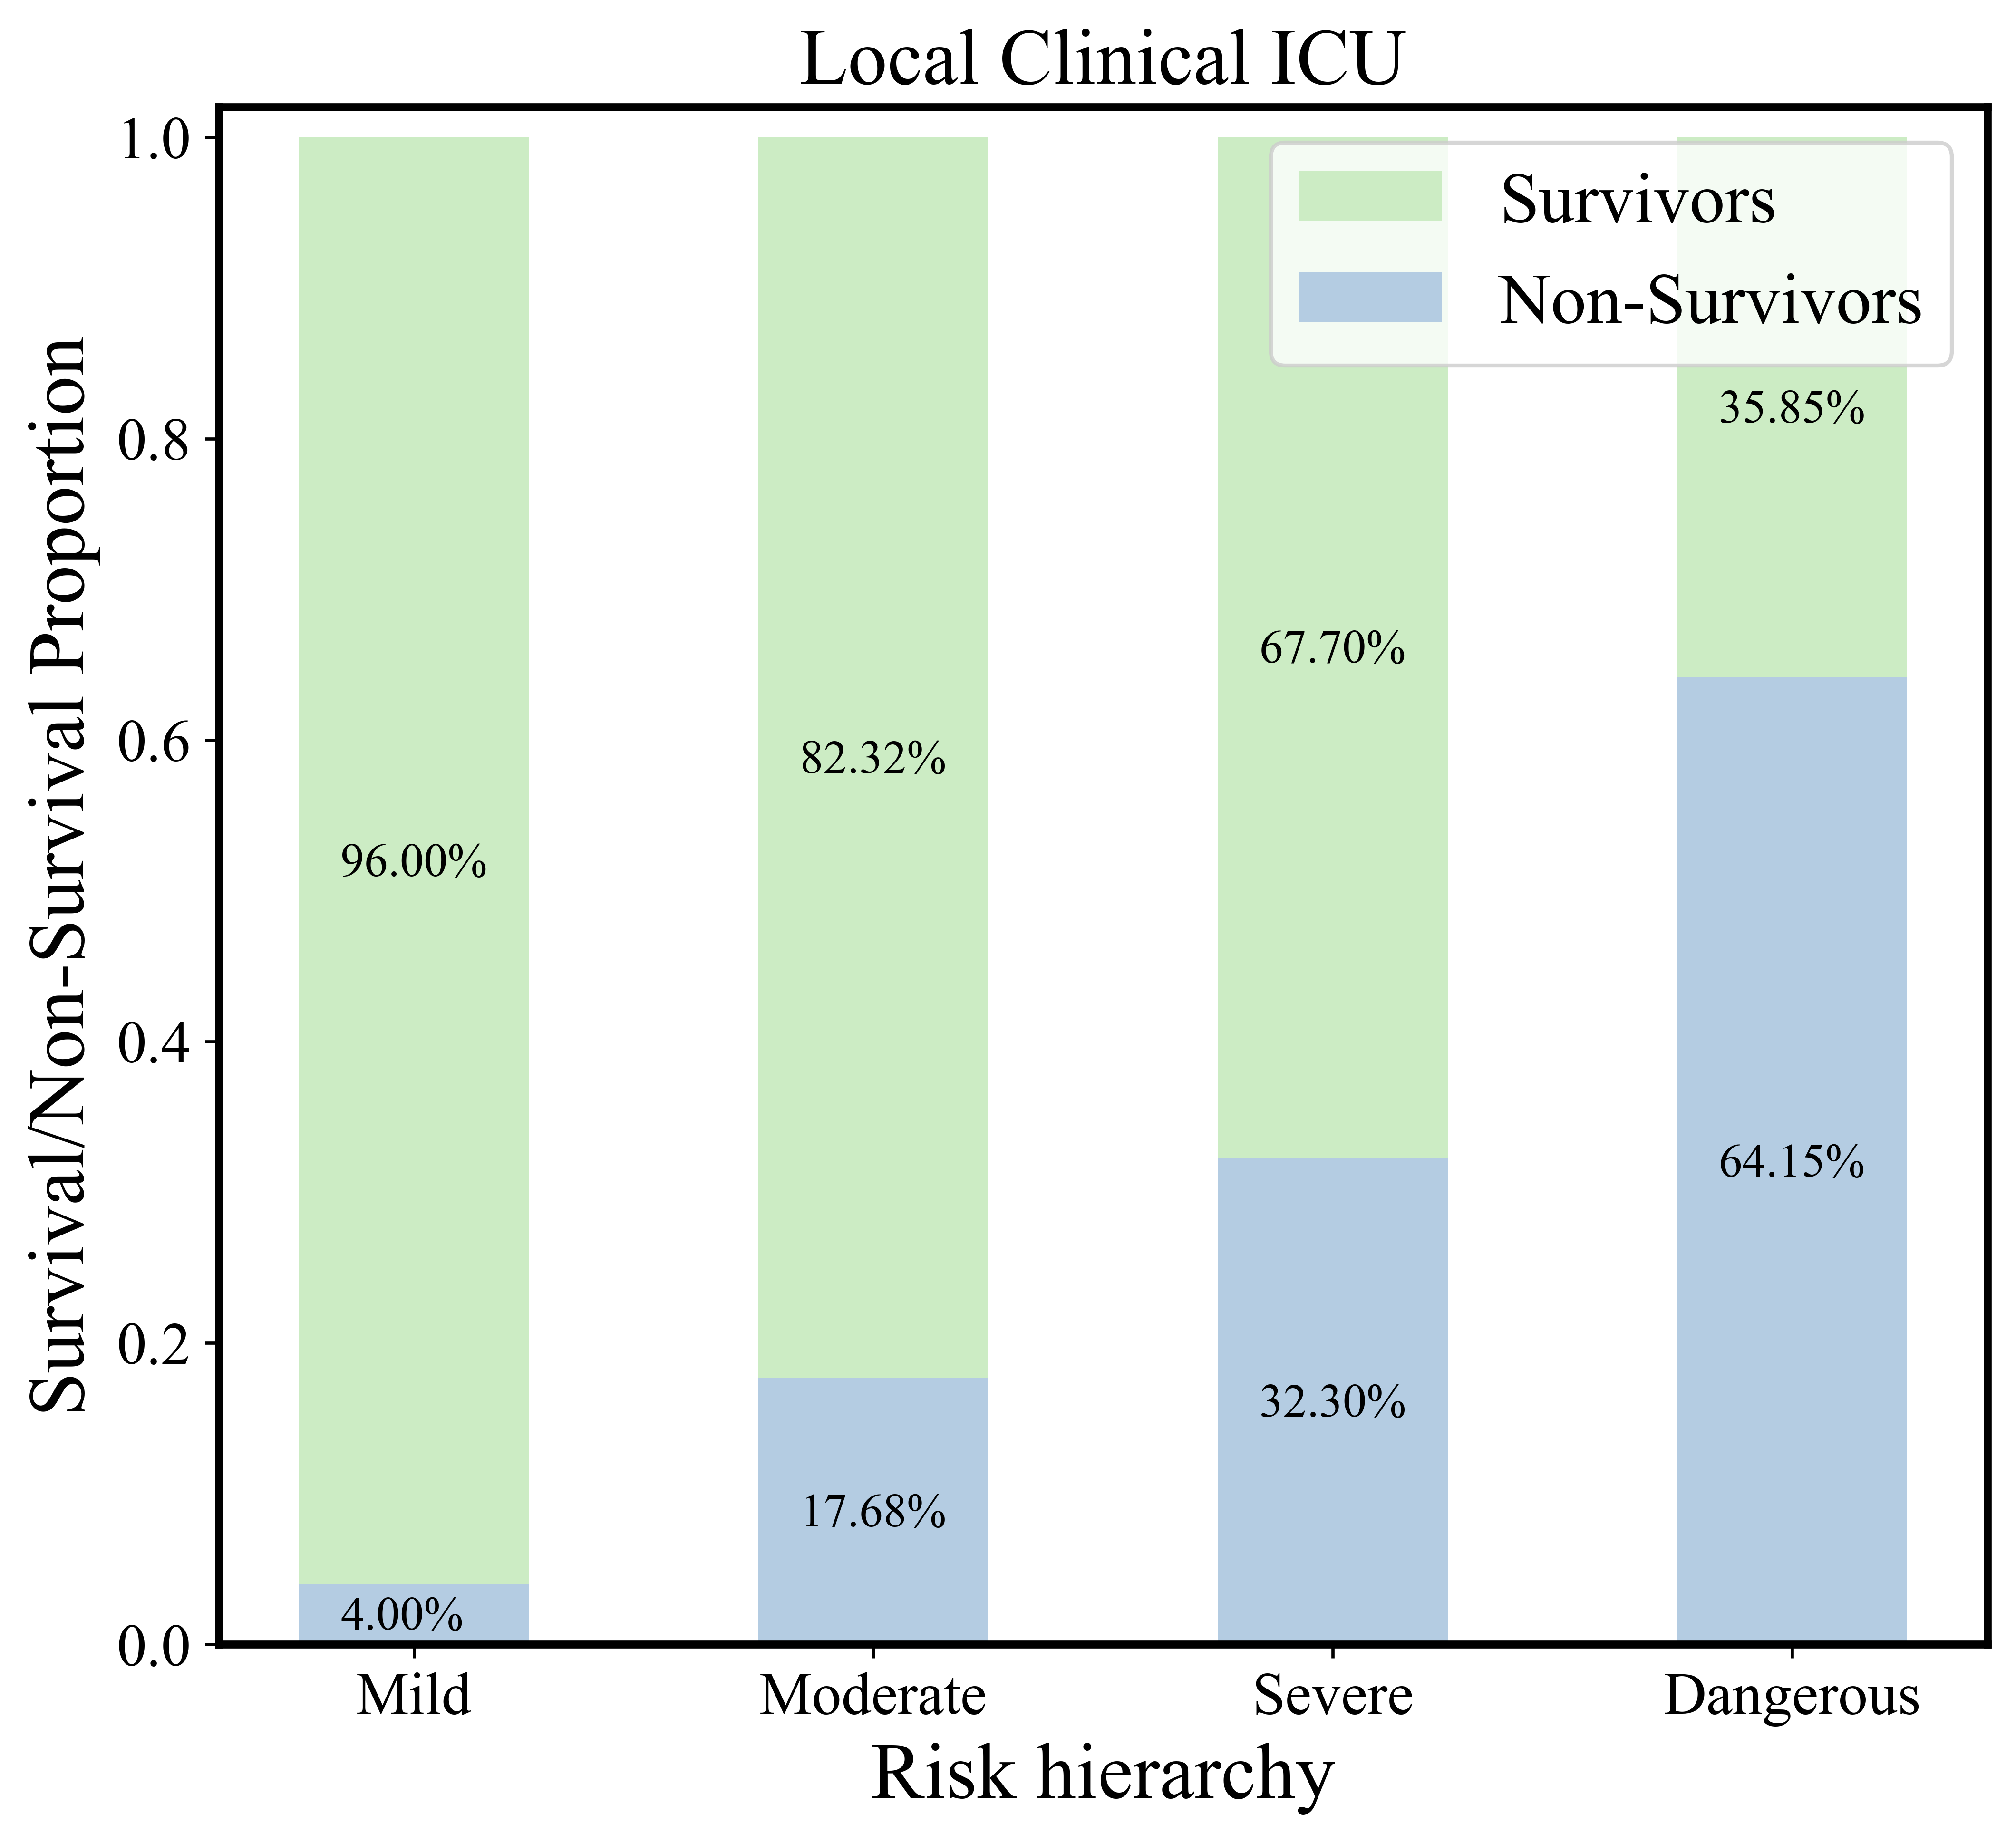

In [78]:

import numpy as np
import matplotlib.pyplot as plt
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        height_label=rect.get_height()*100.0
        # print(height)
        # print(rect.get_x()+rect.get_width()/2.-0.05, height/2.0,)
        plt.text(rect.get_x()+0.09, rect.get_y()+height/2.0-0.01, '%.2lf' % height_label+'%', size=12, family="Times new roman")
 
N = 4
C = [1.00-c1/d1,1.00-c2/d2,1.00-c3/d3, 1.00-c4/d4]
S = [c1/d1,c2/d2,c3/d3,c4/d4]
 

ind = np.arange(N)    # the x locations for the groups

plt.figure(figsize=(8, 7), dpi=600, facecolor='w')  # dpi:每英寸长度的像素点数；facecolor 背景颜色
width = 0.5 
p2 = plt.bar(ind, C, width, bottom=S,color='#CCECC4',label='Survivors')
p1 = plt.bar(ind, S, width, color='#B4CCE2',label='Non-Survivors')#, yerr=womenStd)
plt.ylim((0.00, 1.02))
plt.xlabel('Risk hierarchy', fontsize=20, fontproperties='Times New Roman')
plt.ylabel('Survival/Non-Survival Proportion', fontsize=20, fontproperties='Times New Roman')
autolabel(p1)
autolabel(p2)
ax = plt.gca()  # 获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(2)  # 设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2)  # 设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2)  # 设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)  # 设置顶端坐标轴的粗细
# plt.grid(ls=':', alpha=1, linewidth=1.4)
plt.title('Local Clinical ICU',fontdict={'family': 'Times New Roman', 'size': 20} )  # 打印标题
plt.xticks(ind, ('Mild','Moderate','Severe','Dangerous'),fontproperties='Times New Roman', size=15)
plt.yticks(np.arange(0, 1.01,0.2),fontproperties='Times New Roman', size=15)
plt.legend(loc='best', prop={'family': 'Times New Roman', 'size': 18})
# plt.savefig('log/image_8_29/clinical ICU_nosampling_scorecardpy_评分.svg',dpi=600)
plt.show()

In [3]:
import pandas as pd
import numpy as np
data_score=pd.read_csv("cq_score.csv")
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
def del_duplicate(x_list, y_list):
    real_inx = -1
    x_new = []
    y_new = []
    for inx, x in enumerate(x_list):
        if x not in x_new:
            x_new.append(x)
            real_inx += 1
            # print(real_inx, inx)
            y_new.append([y_list[inx]])
        else:
            y_new[real_inx].append(y_list[inx])
    # 对y_new取平均 sum(y)/len(y)
    y_new = [max(y) for y in y_new]
    # 第一个数必须为0
    # return np.array(x_new), np.array(y_new)
    return x_new, y_new

plt.figure(figsize=(8, 7), dpi=1200, facecolor='w')  # dpi:每英寸长度的像素点数；facecolor 背景颜色
# 假设有真实标签和模型的预测得分
y_true = data_score['dead']
y_scores =data_score['score']
# LIP,SOFA,qSOFA,SIRS,ApacheII
y_scores_lip =data_score['LIP']
y_scores_sofa =data_score['SOFA']
y_scores_qsofa =data_score['qSOFA']
y_scores_sirs =data_score['SIRS']
y_scores_apache =data_score['ApacheII']
# 计算真阳性率和假阳性率
fpr_lip, tpr_lip, thresholds_lip = roc_curve(y_true, y_scores_lip)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
fpr_sofa, tpr_sofa, thresholds_sofa = roc_curve(y_true, y_scores_sofa)
fpr_qsofa, tpr_qsofa, thresholds_qsofa = roc_curve(y_true, y_scores_qsofa)
fpr_sirs, tpr_sirs, thresholds_sirs = roc_curve(y_true, y_scores_sirs)
fpr_apache, tpr_apache, thresholds_apache = roc_curve(y_true, y_scores_apache)

fpr, tpr = del_duplicate(fpr, tpr)
z6 = np.polyfit(fpr, tpr, 10)
p6 = np.poly1d(z6)
y_pred = p6(fpr)

fpr_lip, tpr_lip = del_duplicate(fpr_lip, tpr_lip)
z6_lip = np.polyfit(fpr_lip, tpr_lip, 100)
p6_lip = np.poly1d(z6_lip)
y_pred_lip = p6_lip(fpr_lip)

fpr_sofa, tpr_sofa = del_duplicate(fpr_sofa, tpr_sofa)
z6_sofa = np.polyfit(fpr_sofa, tpr_sofa, 5)
p6_sofa = np.poly1d(z6_sofa)
y_pred_sofa = p6_sofa(fpr_sofa)

fpr_qsofa, tpr_qsofa = del_duplicate(fpr_qsofa, tpr_qsofa)
z6_qsofa = np.polyfit(fpr_qsofa, tpr_qsofa, 2)#2
p6_qsofa = np.poly1d(z6_qsofa)
y_pred_qsofa = p6_qsofa(fpr_qsofa)

fpr_sirs, tpr_sirs = del_duplicate(fpr_sirs, tpr_sirs)
z6_sirs = np.polyfit(fpr_sirs, tpr_sirs, 10)
p6_sirs = np.poly1d(z6_sirs)
y_pred_sirs = p6_sirs(fpr_sirs)

fpr_apache, tpr_apache = del_duplicate(fpr_apache, tpr_apache)
z6_apache = np.polyfit(fpr_apache, tpr_apache, 5)#5
p6_apache = np.poly1d(z6_apache)
y_pred_apache = p6_apache(fpr_apache)





roc_auc_lip = auc(fpr_lip, tpr_lip)
roc_auc = auc(fpr, tpr)
roc_auc_sofa = auc(fpr_sofa, tpr_sofa)
roc_auc_qsofa = auc(fpr_qsofa, tpr_qsofa)
roc_auc_sirs = auc(fpr_sirs, tpr_sirs)
roc_auc_apache = auc(fpr_apache, tpr_apache)
# 绘制 ROC 曲线
#origin
# plt.plot(fpr, tpr, color='darkorange',linestyle='-', lw=2.5, label='SMLR-AUC = %0.4f' % roc_auc)    
# plt.plot(fpr_sofa, tpr_sofa, color='aqua',linestyle='-', lw=2.5, label='SOFA-AUC = %0.4f' % roc_auc_sofa)
# plt.plot(fpr_qsofa, tpr_qsofa, color='#426AB3',linestyle='-', lw=2.5, label='qSOFA1-AUC = %0.4f' % roc_auc_qsofa)
# plt.plot(fpr_lip, tpr_lip, color='#FEDCBD',linestyle='-', lw=2.5, label='LIP-AUC = %0.4f' % roc_auc_lip)
# plt.plot(fpr_apache, tpr_apache, color='#AFB4DB',linestyle='-', lw=2.5, label='APACHEII1-AUC = %0.4f' % roc_auc_apache)
# plt.plot(fpr_sirs, tpr_sirs, color='#BED742',linestyle='-', lw=2.5, label='SIRS-AUC = %0.4f' % roc_auc_sirs)

#pinghua
plt.plot(fpr, tpr, color='darkorange',linestyle='-', lw=4.0, label='SMLR-AUC = %0.4f' % roc_auc)    
plt.plot(fpr_sofa, y_pred_sofa, color='aqua',linestyle='-', lw=4.0, label='SOFA-AUC = %0.4f' % roc_auc_sofa)
plt.plot(fpr_qsofa, y_pred_qsofa, color='#426AB3',linestyle='-', lw=4.0, label='qSOFA-AUC = %0.4f' % roc_auc_qsofa)
plt.plot(fpr_lip, tpr_lip, color='#FEDCBD',linestyle='-', lw=4.0, label='LIP-AUC = %0.4f' % roc_auc_lip)
plt.plot(fpr_apache, y_pred_apache, color='#AFB4DB',linestyle='-', lw=4.0, label='APACHEII-AUC = %0.4f' % roc_auc_apache)
plt.plot(fpr_sirs, tpr_sirs, color='#BED742',linestyle='-', lw=4.0, label='SIRS-AUC = %0.4f' % roc_auc_sirs)


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([-0.01, 1.02])
plt.ylim([-0.01, 1.02])
plt.xticks(np.arange(0, 1.1, 0.1), fontproperties='Times New Roman', size=18)  # 绘制刻度
plt.yticks(np.arange(0, 1.1, 0.1), fontproperties='Times New Roman', size=18)
plt.xlabel('1-Specificity', fontsize=24, fontproperties='Times New Roman')
plt.ylabel('Sensitivity', fontsize=24, fontproperties='Times New Roman')  # 绘制x,y 坐标轴对应的标签
ax = plt.gca()  # 获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(2)  # 设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2)  # 设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2)  # 设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)  # 设置顶端坐标轴的粗细
plt.grid( ls=':', alpha=1, linewidth=1.4)
plt.title(u'Local ICU', fontdict={'family': 'Times New Roman', 'size': 24})  # 打印标题
plt.legend(loc='lower right', prop={'family': 'Times New Roman', 'size': 18})
# plt.savefig("log/image_11_8/ROC_pinghua_clinical_ICU_original_平滑.svg",dpi=1200)
plt.show()


d:\Anaconda3\envs\score_mimic\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
d:\Anaconda3\envs\score_mimic\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [80]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
def del_duplicate(x_list, y_list):
    real_inx = -1
    x_new = []
    y_new = []
    for inx, x in enumerate(x_list):
        if x not in x_new:
            x_new.append(x)
            real_inx += 1
            # print(real_inx, inx)
            y_new.append([y_list[inx]])
        else:
            y_new[real_inx].append(y_list[inx])
    # 对y_new取平均 sum(y)/len(y)
    y_new = [max(y) for y in y_new]
    # 第一个数必须为0
    # return np.array(x_new), np.array(y_new)
    return x_new, y_new

plt.figure(figsize=(8, 7), dpi=1200, facecolor='w')  # dpi:每英寸长度的像素点数；facecolor 背景颜色
# 假设有真实标签和模型的预测得分
y_true = data_score['dead']
y_scores =data_score['score']
# LIP,SOFA,qSOFA,SIRS,ApacheII
y_scores_lip =data_score['LIP']
y_scores_sofa =data_score['SOFA']
y_scores_qsofa =data_score['qSOFA']
y_scores_sirs =data_score['SIRS']
y_scores_apache =data_score['ApacheII']
# 计算真阳性率和假阳性率
fpr_lip, tpr_lip, thresholds_lip = roc_curve(y_true, y_scores_lip)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
fpr_sofa, tpr_sofa, thresholds_sofa = roc_curve(y_true, y_scores_sofa)
fpr_qsofa, tpr_qsofa, thresholds_qsofa = roc_curve(y_true, y_scores_qsofa)
fpr_sirs, tpr_sirs, thresholds_sirs = roc_curve(y_true, y_scores_sirs)
fpr_apache, tpr_apache, thresholds_apache = roc_curve(y_true, y_scores_apache)



roc_auc_lip = auc(fpr_lip, tpr_lip)
roc_auc = auc(fpr, tpr)
roc_auc_sofa = auc(fpr_sofa, tpr_sofa)
roc_auc_qsofa = auc(fpr_qsofa, tpr_qsofa)
roc_auc_sirs = auc(fpr_sirs, tpr_sirs)
roc_auc_apache = auc(fpr_apache, tpr_apache)
# 绘制 ROC 曲线
#origin
# plt.plot(fpr, tpr, color='darkorange',linestyle='-', lw=2.5, label='SMLR-AUC = %0.4f' % roc_auc)    
# plt.plot(fpr_sofa, tpr_sofa, color='aqua',linestyle='-', lw=2.5, label='SOFA-AUC = %0.4f' % roc_auc_sofa)
# plt.plot(fpr_qsofa, tpr_qsofa, color='#426AB3',linestyle='-', lw=2.5, label='qSOFA1-AUC = %0.4f' % roc_auc_qsofa)
# plt.plot(fpr_lip, tpr_lip, color='#FEDCBD',linestyle='-', lw=2.5, label='LIP-AUC = %0.4f' % roc_auc_lip)
# plt.plot(fpr_apache, tpr_apache, color='#AFB4DB',linestyle='-', lw=2.5, label='APACHEII1-AUC = %0.4f' % roc_auc_apache)
# plt.plot(fpr_sirs, tpr_sirs, color='#BED742',linestyle='-', lw=2.5, label='SIRS-AUC = %0.4f' % roc_auc_sirs)

#pinghua
plt.plot(fpr, tpr, color='darkorange',linestyle='-', lw=4.0, label='SMLR-AUC = %0.4f' % roc_auc)    
plt.plot(fpr_sofa, tpr_sofa, color='aqua',linestyle='-', lw=4.0, label='SOFA-AUC = %0.4f' % roc_auc_sofa)
plt.plot(fpr_qsofa, tpr_qsofa, color='#426AB3',linestyle='-', lw=4.0, label='qSOFA-AUC = %0.4f' % roc_auc_qsofa)
plt.plot(fpr_lip, tpr_lip, color='#FEDCBD',linestyle='-', lw=4.0, label='LIP-AUC = %0.4f' % roc_auc_lip)
plt.plot(fpr_apache,tpr_apache, color='#AFB4DB',linestyle='-', lw=4.0, label='APACHEII-AUC = %0.4f' % roc_auc_apache)
plt.plot(fpr_sirs, tpr_sirs, color='#BED742',linestyle='-', lw=4.0, label='SIRS-AUC = %0.4f' % roc_auc_sirs)


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([-0.01, 1.02])
plt.ylim([-0.01, 1.02])
plt.xticks(np.arange(0, 1.1, 0.1), fontproperties='Times New Roman', size=18)  # 绘制刻度
plt.yticks(np.arange(0, 1.1, 0.1), fontproperties='Times New Roman', size=18)
plt.xlabel('1-Specificity', fontsize=24, fontproperties='Times New Roman')
plt.ylabel('Sensitivity', fontsize=24, fontproperties='Times New Roman')  # 绘制x,y 坐标轴对应的标签
ax = plt.gca()  # 获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(2)  # 设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2)  # 设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2)  # 设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)  # 设置顶端坐标轴的粗细
plt.grid( ls=':', alpha=1, linewidth=1.4)
plt.title(u'Local ICU', fontdict={'family': 'Times New Roman', 'size': 24})  # 打印标题
plt.legend(loc='lower right', prop={'family': 'Times New Roman', 'size': 18})
# plt.savefig("log/image_11_8/ROC_clinical_原始图.svg",dpi=1200)
plt.show()


In [12]:
import pandas as pd
import numpy as np
data_score=pd.read_csv("cq_score.csv")
# 得分明细表 
def score_info(df,score_col,target,x=-1,y=50,step=1):
    """
    df:数据集
    target:目标变量的字段名
    score_col:最终得分的字段名
    
    x:最小区间的左值
    y:最大区间的右值
    step:区间的分数间隔
    
    return :得分明细表
    """
    df['分数'] = pd.cut(df[score_col],bins=np.arange(x,y,step),right=True)
    total = df[target].count()
    bad = df[target].sum()
    good = total - bad
    
    group = df.groupby('分数')
    score_info_df = pd.DataFrame()
    score_info_df['病人数'] = group[target].count()
    score_info_df['死亡患者'] = group[target].sum()
    score_info_df['幸存患者'] = score_info_df['病人数']-score_info_df['死亡患者']
    score_info_df['死亡占比'] = score_info_df['死亡患者']/score_info_df['病人数']
    score_info_df['累计病人数'] = score_info_df['病人数'].cumsum()
    score_info_df['死亡累计'] = score_info_df['死亡患者'].cumsum()
    score_info_df['幸存累计'] = score_info_df['幸存患者'].cumsum()
    score_info_df['死亡累计占比'] = score_info_df['死亡累计']/bad 
    score_info_df['幸存累计占比'] = score_info_df['幸存累计']/good
    score_info_df['累计病人数占比'] = score_info_df['累计病人数']/total 
    score_info_df['累计死亡占比'] = score_info_df['死亡累计']/score_info_df['累计病人数']
    score_info_df = score_info_df.reset_index()
    # score_info_df.to_csv("log/image_7_10/得分明细表_2371.csv")
    return score_info_df

score_info(data_score,'ApacheII','dead')

分数  病人数  死亡患者  幸存患者      死亡占比  累计病人数  死亡累计  幸存累计    死亡累计占比  \
0    (-1, 0]    0     0     0       NaN      0     0     0  0.000000   
1     (0, 1]    0     0     0       NaN      0     0     0  0.000000   
2     (1, 2]    1     1     0  1.000000      1     1     0  0.008547   
3     (2, 3]    0     0     0       NaN      1     1     0  0.008547   
4     (3, 4]    0     0     0       NaN      1     1     0  0.008547   
5     (4, 5]    3     1     2  0.333333      4     2     2  0.017094   
6     (5, 6]    6     1     5  0.166667     10     3     7  0.025641   
7     (6, 7]    7     0     7  0.000000     17     3    14  0.025641   
8     (7, 8]    9     2     7  0.222222     26     5    21  0.042735   
9     (8, 9]   11     3     8  0.272727     37     8    29  0.068376   
10   (9, 10]   11     0    11  0.000000     48     8    40  0.068376   
11  (10, 11]   17     2    15  0.117647     65    10    55  0.085470   
12  (11, 12]   15     3    12  0.200000     80    13    67  0.111111   
13  (12, 13]   22     6    16  0.272727    102    19    83  0.162393   
14  (13, 14]   27     7    20  0.259259    129    26   103  0.222222   
15  (14, 15]   40     7    33  0.175000    169    33   136  0.282051   
16  (15, 16]   21     7    14  0.333333    190    40   150  0.341880   
17  (16, 17]   27     8    19  0.296296    217    48   169  0.410256   
18  (17, 18]   35     9    26  0.257143    252    57   195  0.487179   
19  (18, 19]   31     6    25  0.193548    283    63   220  0.538462   
20  (19, 20]   29     8    21  0.275862    312    71   241  0.606838   
21  (20, 21]   17     4    13  0.235294    329    75   254  0.641026   
22  (21, 22]   19     5    14  0.263158    348    80   268  0.683761   
23  (22, 23]   13     4     9  0.307692    361    84   277  0.717949   
24  (23, 24]   16     6    10  0.375000    377    90   287  0.769231   
25  (24, 25]    9     3     6  0.333333    386    93   293  0.794872   
26  (25, 26]    6     0     6  0.000000    392    93   299  0.794872   
27  (26, 27]    5     4     1  0.800000    397    97   300  0.829060   
28  (27, 28]    5     2     3  0.400000    402    99   303  0.846154   
29  (28, 29]    3     1     2  0.333333    405   100   305  0.854701   
30  (29, 30]    1     1     0  1.000000    406   101   305  0.863248   
31  (30, 31]    4     2     2  0.500000    410   103   307  0.880342   
32  (31, 32]    7     5     2  0.714286    417   108   309  0.923077   
33  (32, 33]    3     2     1  0.666667    420   110   310  0.940171   
34  (33, 34]    0     0     0       NaN    420   110   310  0.940171   
35  (34, 35]    1     1     0  1.000000    421   111   310  0.948718   
36  (35, 36]    1     1     0  1.000000    422   112   310  0.957265   
37  (36, 37]    1     1     0  1.000000    423   113   310  0.965812   
38  (37, 38]    3     3     0  1.000000    426   116   310  0.991453   
39  (38, 39]    0     0     0       NaN    426   116   310  0.991453   
40  (39, 40]    0     0     0       NaN    426   116   310  0.991453   
41  (40, 41]    0     0     0       NaN    426   116   310  0.991453   
42  (41, 42]    0     0     0       NaN    426   116   310  0.991453   
43  (42, 43]    0     0     0       NaN    426   116   310  0.991453   
44  (43, 44]    1     1     0  1.000000    427   117   310  1.000000   
45  (44, 45]    1     0     1  0.000000    428   117   311  1.000000   
46  (45, 46]    0     0     0       NaN    428   117   311  1.000000   
47  (46, 47]    0     0     0       NaN    428   117   311  1.000000   
48  (47, 48]    0     0     0       NaN    428   117   311  1.000000   
49  (48, 49]    0     0     0       NaN    428   117   311  1.000000   

      幸存累计占比   累计病人数占比    累计死亡占比  
0   0.000000  0.000000       NaN  
1   0.000000  0.000000       NaN  
2   0.000000  0.002336  1.000000  
3   0.000000  0.002336  1.000000  
4   0.000000  0.002336  1.000000  
5   0.006431  0.009346  0.500000  
6   0.022508  0.023364  0.300000  
7   0.045016  0.039720  0.176471  
8   0.067524  0.060748

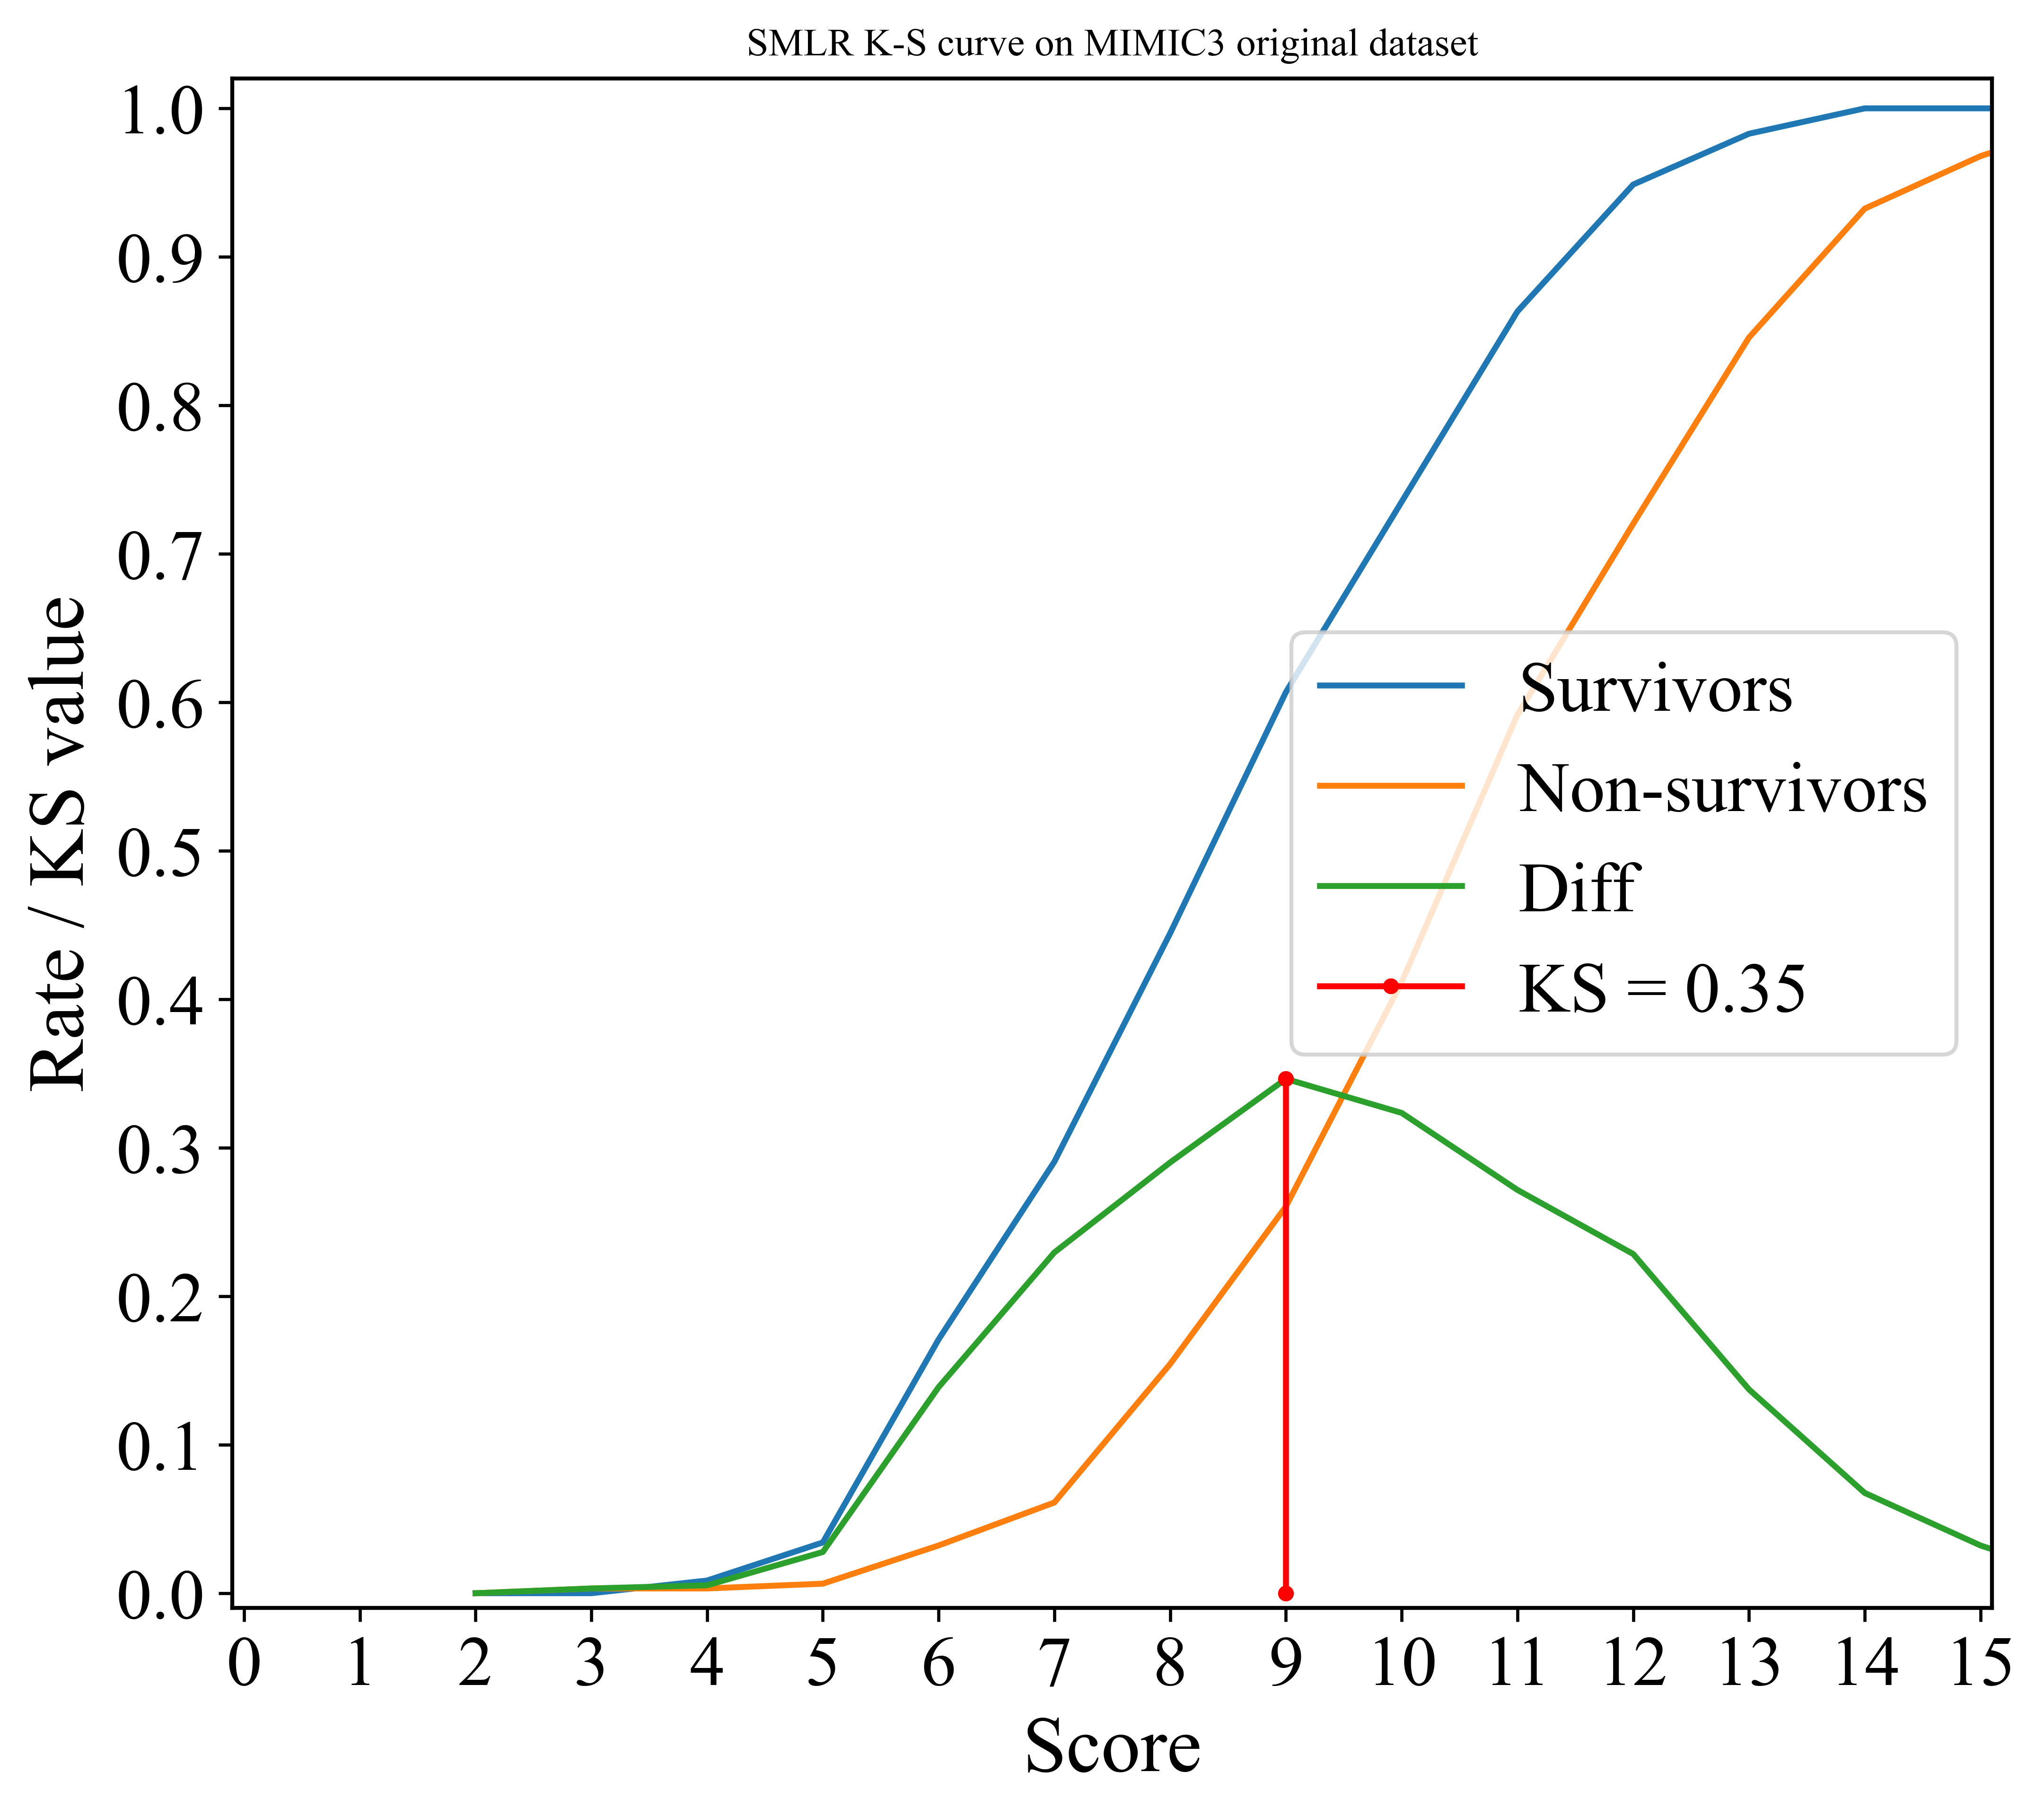

In [82]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 7), dpi=600, facecolor='w')  # dpi:每英寸长度的像素点数；facecolor 背景颜色
# 假设有真实标签和模型的预测得分
y_true = data_score['dead']
y_scores =data_score['score']
# y_scores_sofa =datasc['SOFAscore']
# 计算真阳性率和假阳性率
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
fpr_sofa, tpr_sofa, thresholds_sofa = roc_curve(y_true, y_scores_sofa,pos_label=0)
roc_auc = auc(fpr, tpr)
roc_auc_sofa = auc(fpr_sofa, tpr_sofa)
# 绘制 ROC 曲线
# print(fpr,tpr,thresholds)
thresholds=thresholds[::-1]
# 计算K-S统计量
ks_statistic = np.max(tpr - fpr)
# 计算K-S曲线
ks_curve = np.abs(tpr - fpr)
ks_value = max(abs(fpr-tpr))
ax = plt.gca()  # 获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(1)  # 设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(1)  # 设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(1)  # 设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(1)  # 设置顶端坐标轴的粗细
# plt.grid(b=True, ls=':', alpha=1, linewidth=1.4)
plt.xlim((-0.1, 15.1))  # x,y 轴刻度的范围
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 15.1, 1), fontproperties='Times New Roman', size=18)  # 绘制刻度
plt.yticks(np.arange(0, 1.1, 0.1), fontproperties='Times New Roman', size=18)
# 绘制K-S曲线、TPR和FPR
plt.plot(thresholds, tpr, label='Survivors')
plt.plot(thresholds, fpr, label='Non-survivors')

plt.plot(thresholds, ks_curve, label='Diff'.format(max(ks_curve)))
x = np.argwhere(abs(fpr-tpr) == ks_value)[0, 0]+2
plt.plot((x, x), (0, ks_value), label='KS = {:.2f}'.format(ks_value), color='r', marker='o', markerfacecolor='r', markersize=3)
# plt.scatter((x, x), (0, ks_value), color='r')

plt.ylabel('Rate / KS value', fontsize=20, fontproperties='Times New Roman')  # 绘制x,y 坐标轴对应的标签
plt.xlabel('Score', fontsize=20, fontproperties='Times New Roman')
plt.title(u'SMLR K-S curve on MIMIC3 original dataset', fontsize=20, fontproperties='Times New Roman')  # 打印标题
plt.legend(loc='center right', prop={'family': 'Times New Roman', 'size': 18})
# plt.savefig('log/image_6_15/SMLR_KS_mimic3_original.svg',dpi=600)
plt.show()